<a href="https://colab.research.google.com/github/Vladzimir-40/Proj_1/blob/main/my_file2/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kagglehub

from google.colab import files
files.upload() # Загрузите файл kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vladimir401011","key":"e6b9eec8a00a0a7c2c3e5fcbd033ab06"}'}

In [4]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("nikhil7280/weather-type-classification")
print("Path to dataset files:", path)

# 1. Посмотрим, что внутри папки
print("Files in the directory:")
for file in os.listdir(path):
    print(f" - {file}")

Using Colab cache for faster access to the 'weather-type-classification' dataset.
Path to dataset files: /kaggle/input/weather-type-classification
Files in the directory:
 - weather_classification_data.csv


In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil7280/weather-type-classification")
print("Path to dataset files:", path)

# Прочитать файлы с помощью Pandas
import pandas as pd
df = pd.read_csv(path + '/weather_classification_data.csv')
print(df.head())

Using Colab cache for faster access to the 'weather-type-classification' dataset.
Path to dataset files: /kaggle/input/weather-type-classification
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter       

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB
None


In [17]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


АНАЛИЗ КОЛОНКИ Weather Type
Уникальные типы погоды:
['Rainy' 'Cloudy' 'Sunny' 'Snowy']

Распределение типов погоды:
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


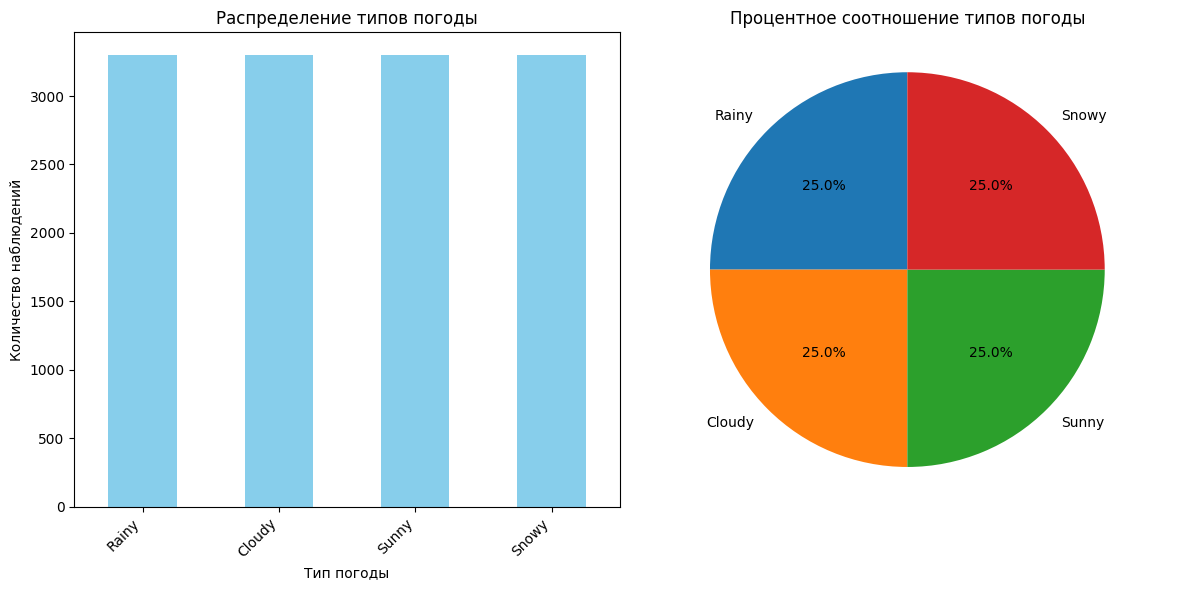


АНАЛИЗ ВЗАИМОСВЯЗЕЙ Weather Type С ДРУГИМИ ПРИЗНАКАМИ
Средние значения признаков по типам погоды:
              Temperature   Humidity  Wind Speed  Precipitation (%)  \
Weather Type                                                          
Cloudy          22.823636  66.528788    8.601818          40.286364   
Rainy           22.788182  78.397879   13.677576          74.752424   
Snowy           -1.530606  78.510303   10.976212          74.586061   
Sunny           32.429091  51.406364    6.073182          24.952727   

              Atmospheric Pressure  UV Index  Visibility (km)  
Weather Type                                                   
Cloudy                 1010.170724  3.583939         7.071212  
Rainy                  1004.149848  2.684242         3.628485  
Snowy                   991.051842  1.950303         3.591515  
Sunny                  1017.939170  7.804545         7.560455  


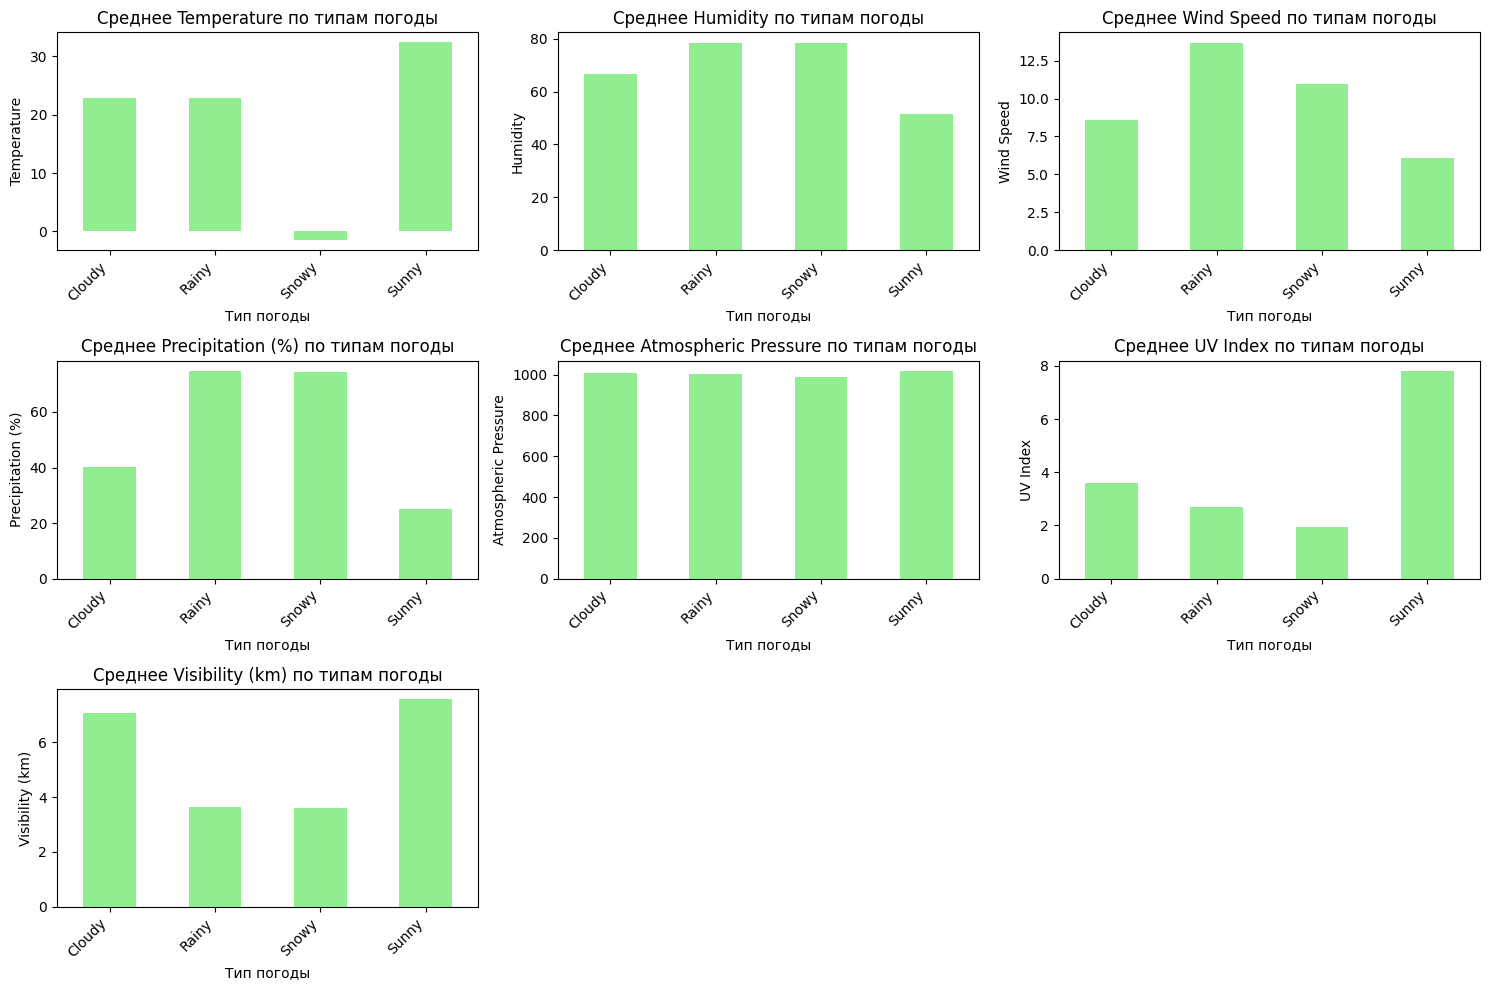

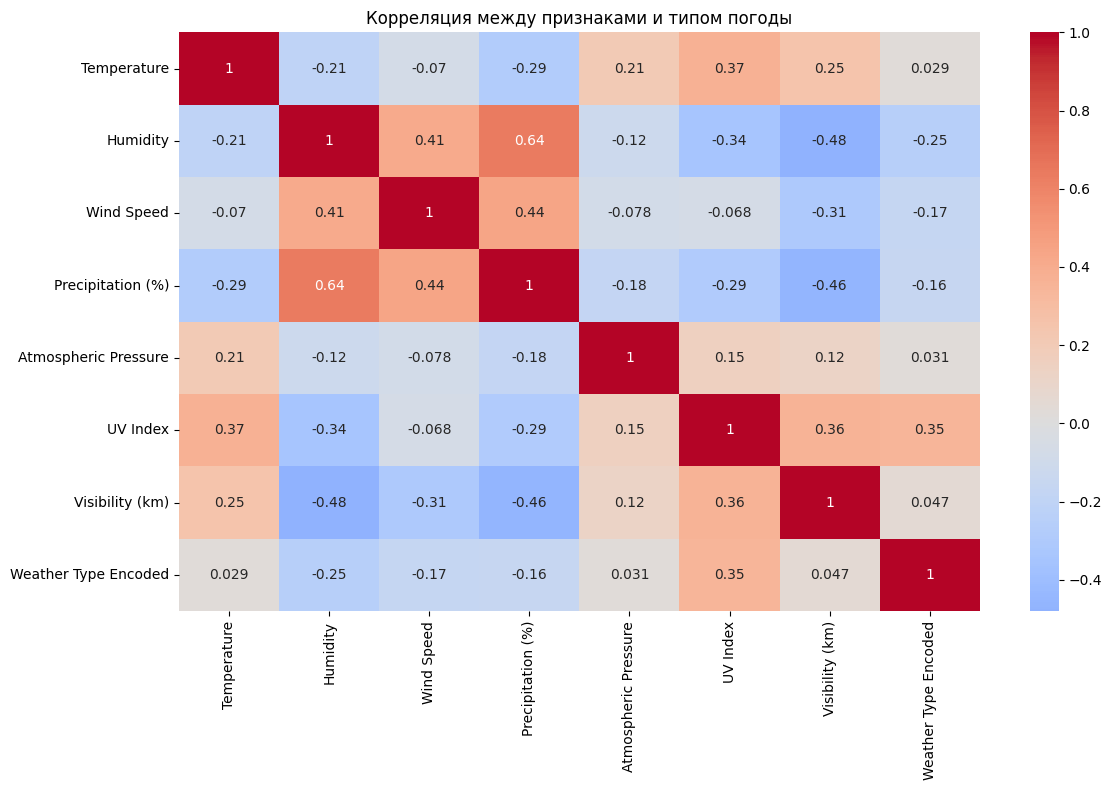

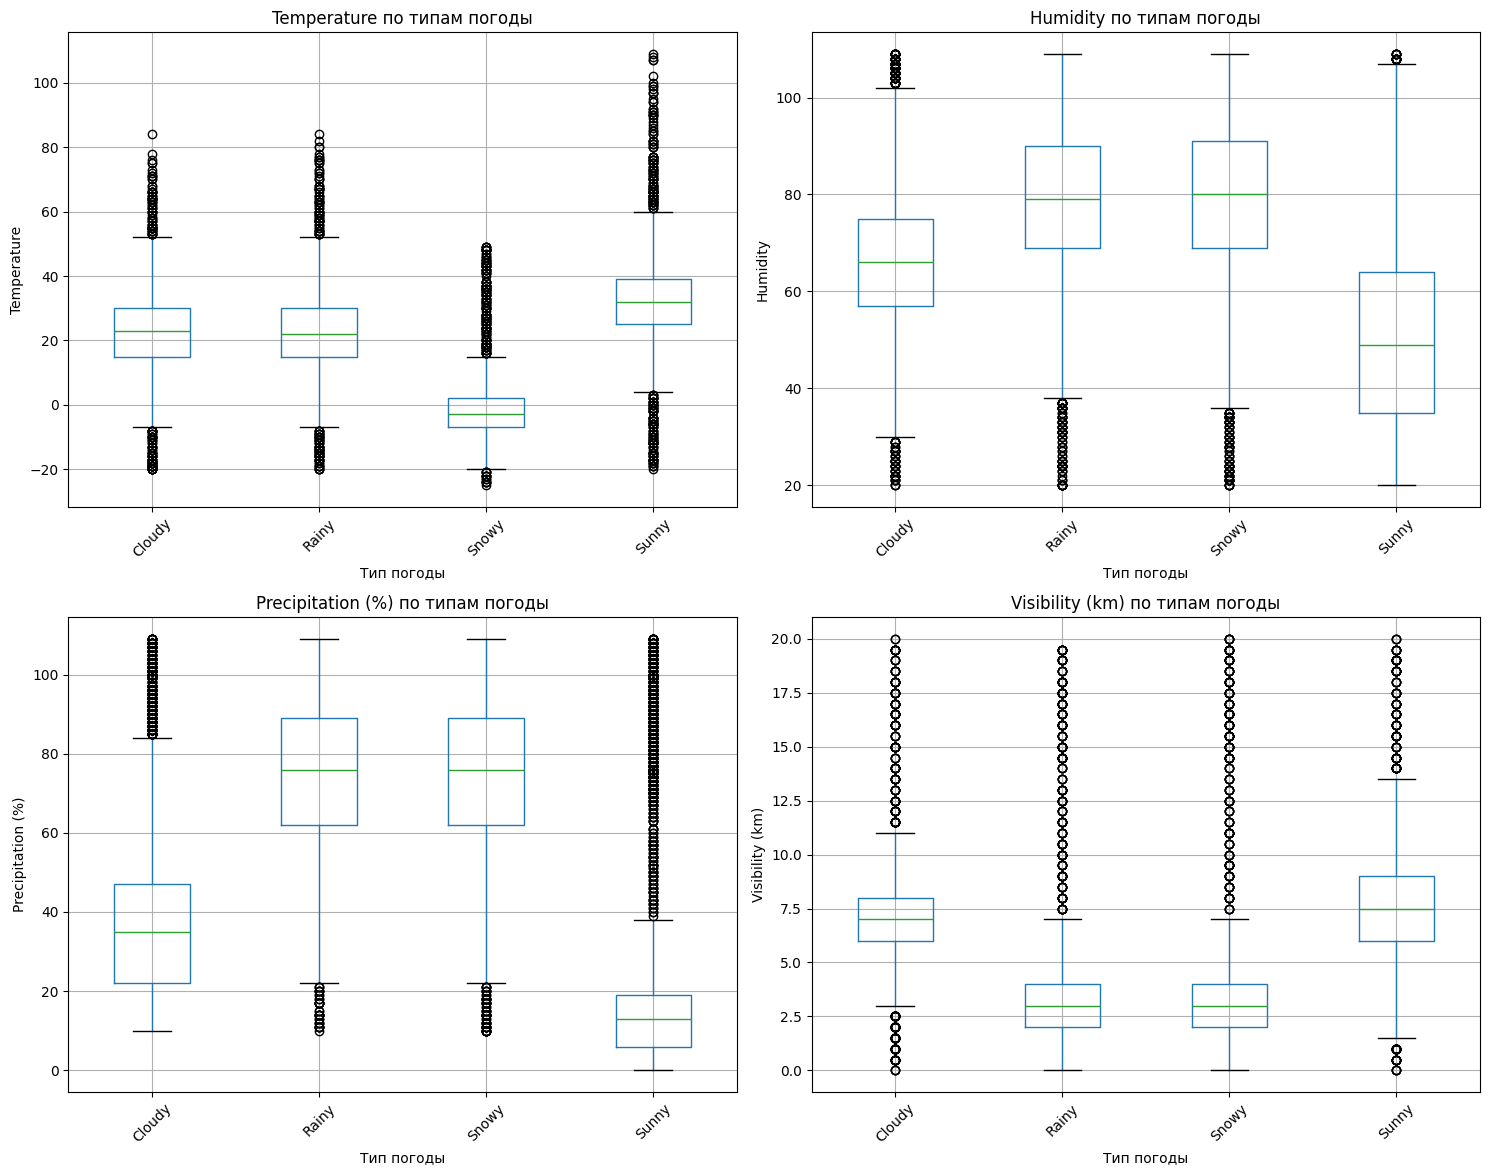


АНАЛИЗ СЕЗОННОСТИ ТИПОВ ПОГОДЫ
Распределение типов погоды по сезонам:
Weather Type  Cloudy  Rainy  Snowy  Sunny
Season                                   
Autumn           806    796     69    829
Spring           850    831     80    837
Summer           766    820     65    841
Winter           878    853   3086    793


<Figure size 1200x800 with 0 Axes>

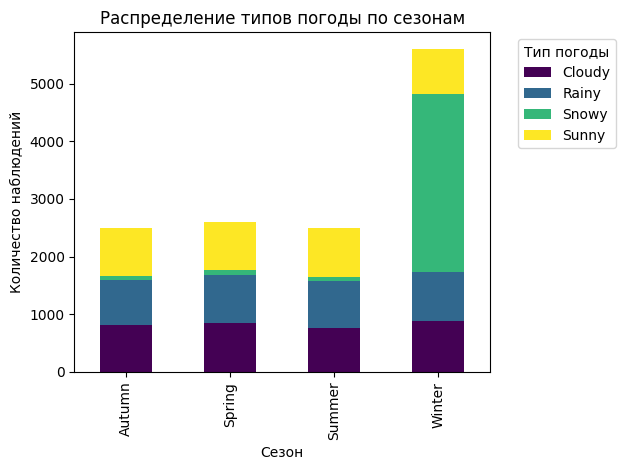


АНАЛИЗ РАСПРЕДЕЛЕНИЯ ТИПОВ ПОГОДЫ ПО ЛОКАЦИЯМ


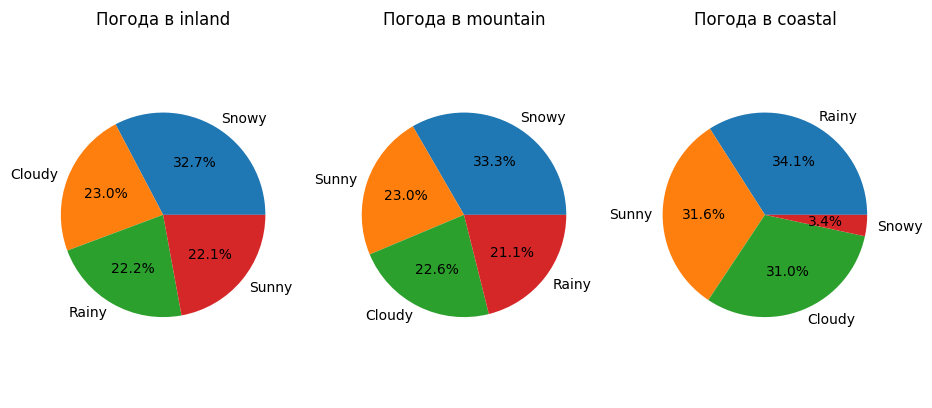

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Анализ колонки Weather Type
print("="*60)
print("АНАЛИЗ КОЛОНКИ Weather Type")
print("="*60)

# Посмотрим на уникальные значения и их распределение
print("Уникальные типы погоды:")
print(df['Weather Type'].unique())

print("\nРаспределение типов погоды:")
weather_type_counts = df['Weather Type'].value_counts()
print(weather_type_counts)

# Визуализация распределения типов погоды
plt.figure(figsize=(12, 6))

# Столбчатая диаграмма
plt.subplot(1, 2, 1)
weather_type_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение типов погоды')
plt.xlabel('Тип погоды')
plt.ylabel('Количество наблюдений')
plt.xticks(rotation=45, ha='right')

# Круговая диаграмма
plt.subplot(1, 2, 2)
plt.pie(weather_type_counts, labels=weather_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Процентное соотношение типов погоды')
plt.axis('equal')  # Чтобы диаграмма была круглой

plt.tight_layout()
plt.show()

# Анализ взаимосвязи Weather Type с другими признаками
print("\n" + "="*60)
print("АНАЛИЗ ВЗАИМОСВЯЗЕЙ Weather Type С ДРУГИМИ ПРИЗНАКАМИ")
print("="*60)

# Для визуализации удобно закодировать Weather Type числовыми значениями
le = LabelEncoder()
df_encoded = df.copy()
df_encoded['Weather Type Encoded'] = le.fit_transform(df['Weather Type'])

# Посмотрим на средние значения числовых признаков по каждому типу погоды
numeric_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                    'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

print("Средние значения признаков по типам погоды:")
weather_type_means = df.groupby('Weather Type')[numeric_features].mean()
print(weather_type_means)

# Визуализация средних значений признаков по типам погоды
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    weather_type_means[feature].plot(kind='bar', color='lightgreen')
    plt.title(f'Среднее {feature} по типам погоды')
    plt.xlabel('Тип погоды')
    plt.ylabel(feature)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Тепловая карта корреляций с закодированным типом погоды
plt.figure(figsize=(12, 8))
correlation_matrix = df_encoded[numeric_features + ['Weather Type Encoded']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция между признаками и типом погоды')
plt.tight_layout()
plt.show()

# Более детальный анализ для нескольких ключевых признаков
key_features = ['Temperature', 'Humidity', 'Precipitation (%)', 'Visibility (km)']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    # Boxplot для каждого признака по типам погоды
    df.boxplot(column=feature, by='Weather Type', ax=axes[i])
    axes[i].set_title(f'{feature} по типам погоды')
    axes[i].set_xlabel('Тип погоды')
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('')  # Убираем автоматический заголовок
plt.tight_layout()
plt.show()

# Анализ сезонности погодных типов
if 'Season' in df.columns:
    print("\n" + "="*60)
    print("АНАЛИЗ СЕЗОННОСТИ ТИПОВ ПОГОДЫ")
    print("="*60)

    # Кросс-таблица сезонов и типов погоды
    season_weather_cross = pd.crosstab(df['Season'], df['Weather Type'])
    print("Распределение типов погоды по сезонам:")
    print(season_weather_cross)

    # Визуализация
    plt.figure(figsize=(12, 8))
    season_weather_cross.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title('Распределение типов погоды по сезонам')
    plt.xlabel('Сезон')
    plt.ylabel('Количество наблюдений')
    plt.legend(title='Тип погоды', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Анализ локаций и типов погоды
if 'Location' in df.columns:
    print("\n" + "="*60)
    print("АНАЛИЗ РАСПРЕДЕЛЕНИЯ ТИПОВ ПОГОДЫ ПО ЛОКАЦИЯМ")
    print("="*60)

    # Посмотрим на топ-10 локаций
    top_locations = df['Location'].value_counts().head(10).index

    plt.figure(figsize=(15, 8))
    for i, location in enumerate(top_locations):
        location_data = df[df['Location'] == location]
        weather_counts = location_data['Weather Type'].value_counts()

        plt.subplot(2, 5, i+1)
        plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%')
        plt.title(f'Погода в {location}')
        plt.axis('equal')

    plt.tight_layout()
    plt.show()

# Дополнительно: самые важные признаки по корреляции с целевой переменной
#print("Корреляции с целевой переменной (Precipitation (%)):")
#correlation_with_target = correlation_matrix['Precipitation (%)'].sort_values(ascending=False)
#print(correlation_with_target)

#print("\nКорреляции с бинарной целевой переменной (has_precipitation):")
#correlation_with_binary_target = correlation_matrix['has_precipitation'].sort_values(ascending=False)
#print(correlation_with_binary_target)

Размер датасета до удаления выбросов: (13200, 11)
Размер датасета после удаления выбросов: (10430, 11)
Удалено записей: 2770


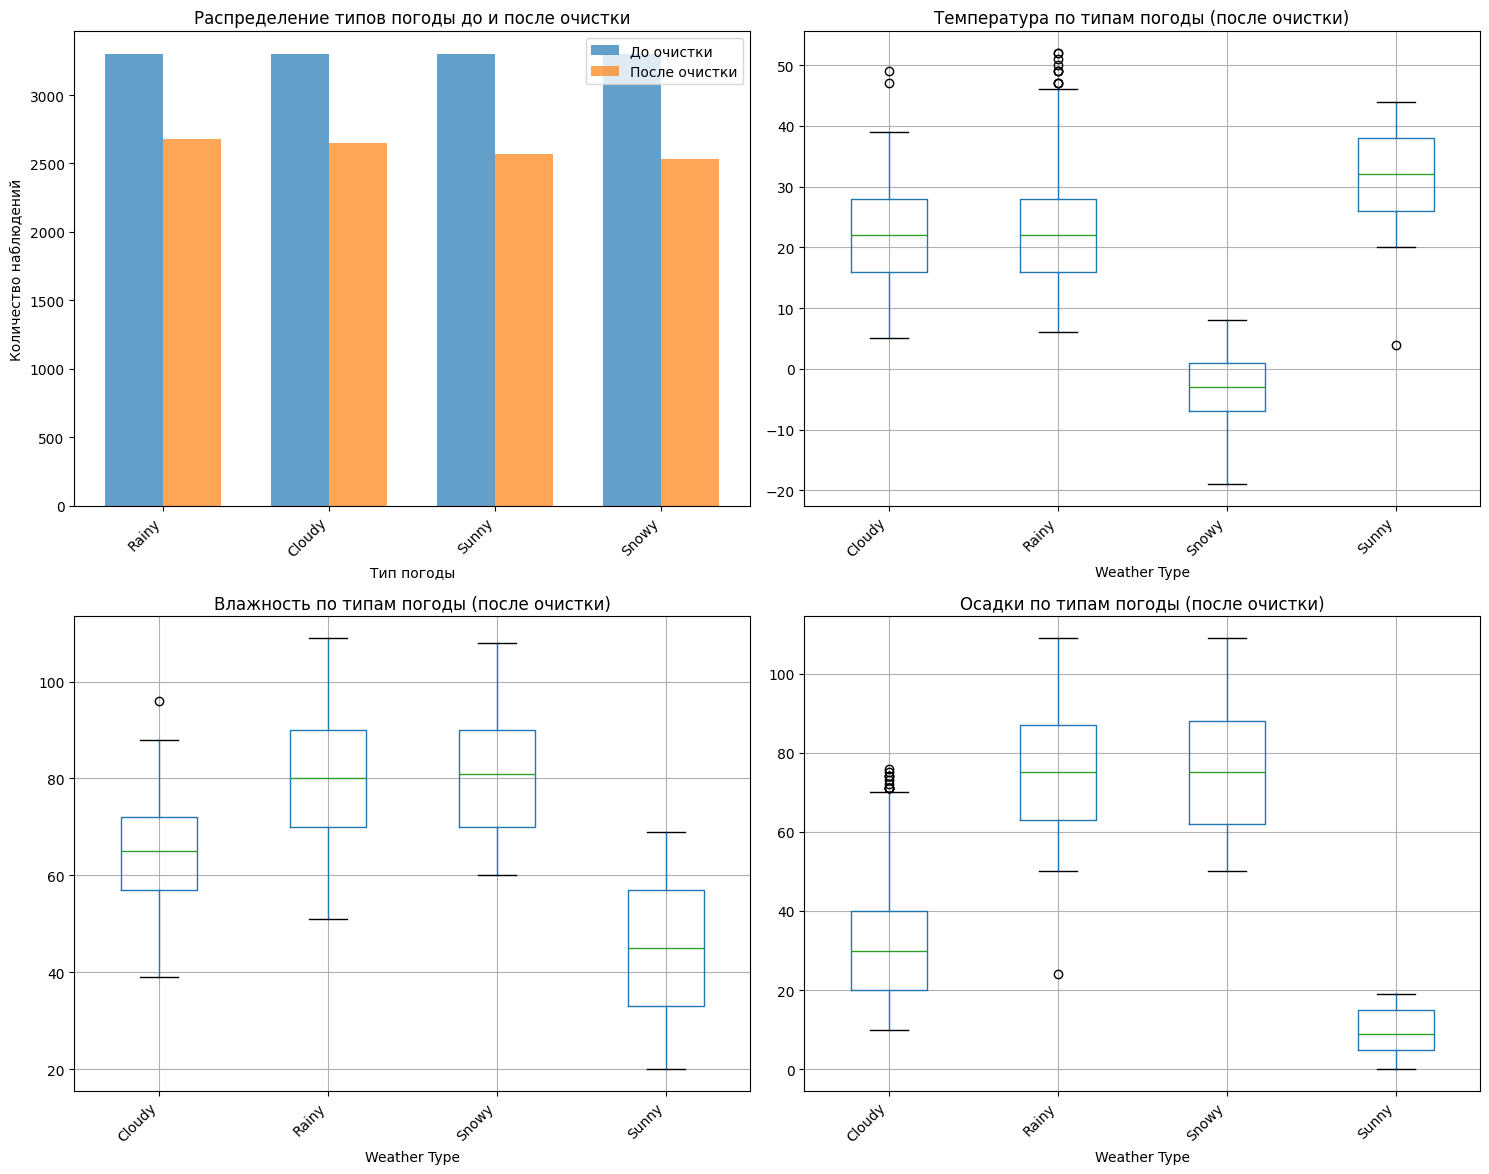

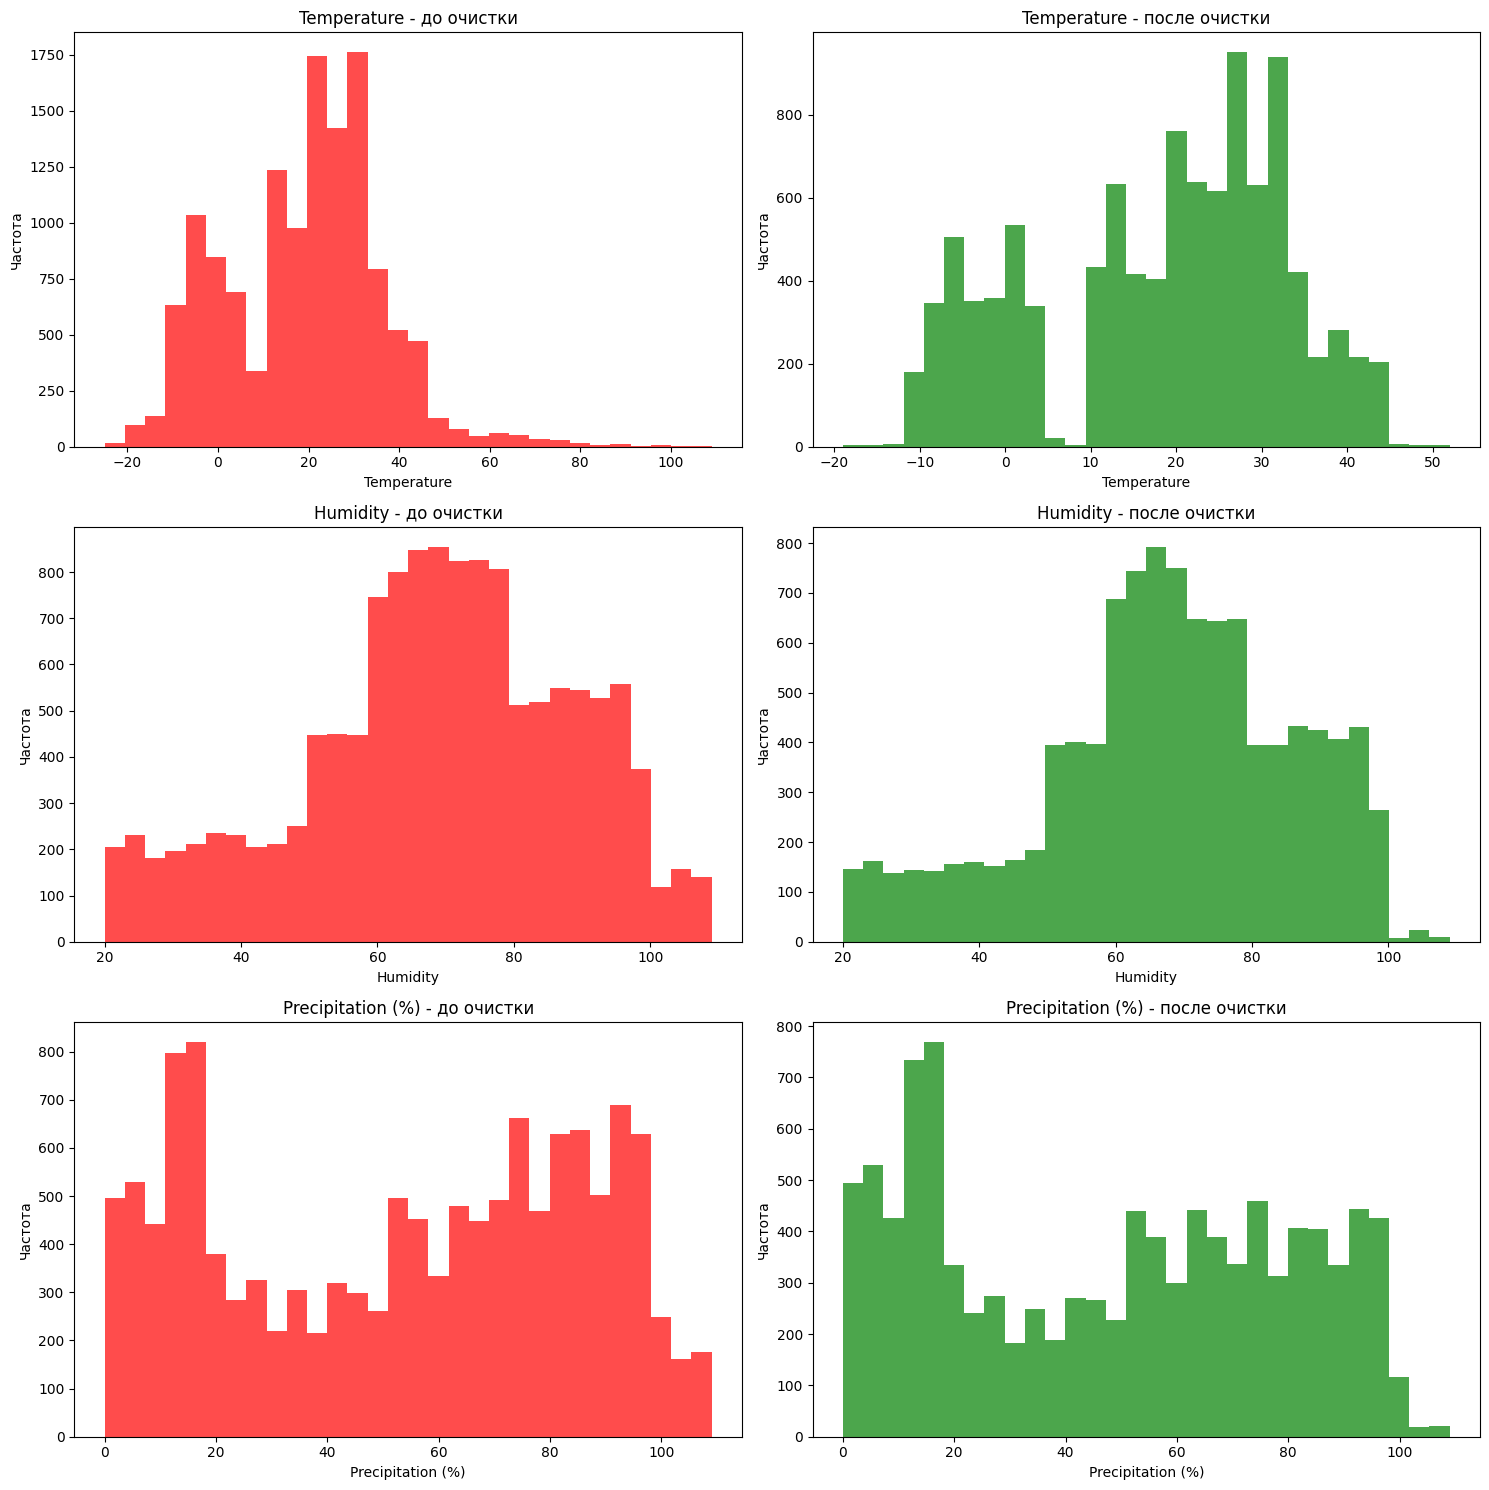

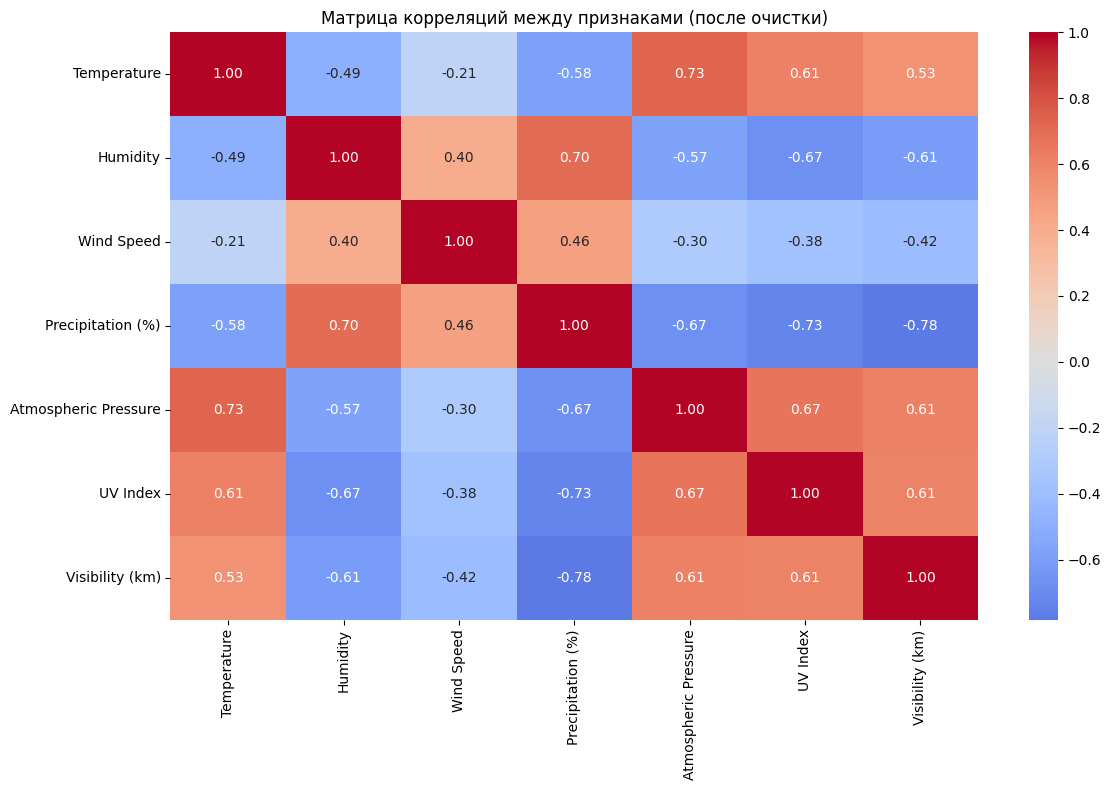


Статистика по числовым признакам после очистки:
        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  10430.000000  10430.000000  10430.000000       10430.000000   
mean      18.149185     67.697987      8.928428          47.996357   
std       14.620556     18.682316      5.450545          31.051002   
min      -19.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          17.000000   
50%       21.000000     68.000000      8.500000          51.000000   
75%       30.000000     81.000000     13.000000          75.000000   
max       52.000000    109.000000     32.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          10430.000000  10430.000000     10430.000000  
mean            1006.012099      3.094247         5.087776  
std               12.644673      3.168130         2.481592  
min              980.010000      0.000000         0.000000  
25%            

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Функция для удаления выбросов с использованием IQR для каждого класса отдельно
def remove_outliers_by_group(df, group_column, numeric_columns):
    df_clean = pd.DataFrame()

    for weather_type in df[group_column].unique():
        # Выбираем данные для конкретного типа погоды
        group_data = df[df[group_column] == weather_type].copy()

        # Удаляем выбросы для каждого числового признака в этой группе
        for column in numeric_columns:
            Q1 = group_data[column].quantile(0.25)
            Q3 = group_data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Фильтруем выбросы
            group_data = group_data[(group_data[column] >= lower_bound) &
                                   (group_data[column] <= upper_bound)]

        # Добавляем очищенные данные в результирующий DataFrame
        df_clean = pd.concat([df_clean, group_data])

    return df_clean

# Определяем числовые признаки для очистки
numeric_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                  'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

# Удаляем выбросы для каждого типа погоды отдельно
print("Размер датасета до удаления выбросов:", df.shape)
df_clean = remove_outliers_by_group(df, 'Weather Type', numeric_columns)
print("Размер датасета после удаления выбросов:", df_clean.shape)
print(f"Удалено записей: {df.shape[0] - df_clean.shape[0]}")

# Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Сравнение распределения типов погоды до и после
plt.subplot(2, 2, 1)
weather_before = df['Weather Type'].value_counts()
weather_after = df_clean['Weather Type'].value_counts()

x = np.arange(len(weather_before))
width = 0.35

plt.bar(x - width/2, weather_before.values, width, label='До очистки', alpha=0.7)
plt.bar(x + width/2, weather_after.values, width, label='После очистки', alpha=0.7)

plt.xlabel('Тип погоды')
plt.ylabel('Количество наблюдений')
plt.title('Распределение типов погоды до и после очистки')
plt.xticks(x, weather_before.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# 2. Boxplot для температуры по типам погоды после очистки
plt.subplot(2, 2, 2)
df_clean.boxplot(column='Temperature', by='Weather Type', ax=axes[0, 1])
axes[0, 1].set_title('Температура по типам погоды (после очистки)')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

# 3. Boxplot для влажности по типам погоды после очистки
plt.subplot(2, 2, 3)
df_clean.boxplot(column='Humidity', by='Weather Type', ax=axes[1, 0])
axes[1, 0].set_title('Влажность по типам погоды (после очистки)')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

# 4. Boxplot для осадков по типам погоды после очистки
plt.subplot(2, 2, 4)
df_clean.boxplot(column='Precipitation (%)', by='Weather Type', ax=axes[1, 1])
axes[1, 1].set_title('Осадки по типам погоды (после очистки)')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

plt.suptitle('')  # Убираем автоматический заголовок
plt.tight_layout()
plt.show()

# Дополнительная визуализация: сравнение распределений ключевых признаков
key_features = ['Temperature', 'Humidity', 'Precipitation (%)']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, feature in enumerate(key_features):
    # Распределение до очистки
    axes[i, 0].hist(df[feature], bins=30, alpha=0.7, color='red', label='До очистки')
    axes[i, 0].set_title(f'{feature} - до очистки')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Частота')

    # Распределение после очистки
    axes[i, 1].hist(df_clean[feature], bins=30, alpha=0.7, color='green', label='После очистки')
    axes[i, 1].set_title(f'{feature} - после очистки')
    axes[i, 1].set_xlabel(feature)
    axes[i, 1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

# Анализ корреляций после очистки
plt.figure(figsize=(12, 8))
correlation_matrix = df_clean[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций между признаками (после очистки)')
plt.tight_layout()
plt.show()

# Статистика после очистки
print("\nСтатистика по числовым признакам после очистки:")
print(df_clean[numeric_columns].describe())

Обучение модели Random Forest...
Точность модели: 0.9990

Отчет о классификации:
              precision    recall  f1-score   support

      Cloudy       1.00      1.00      1.00       514
       Rainy       1.00      1.00      1.00       536
       Snowy       1.00      1.00      1.00       529
       Sunny       1.00      1.00      1.00       507

    accuracy                           1.00      2086
   macro avg       1.00      1.00      1.00      2086
weighted avg       1.00      1.00      1.00      2086



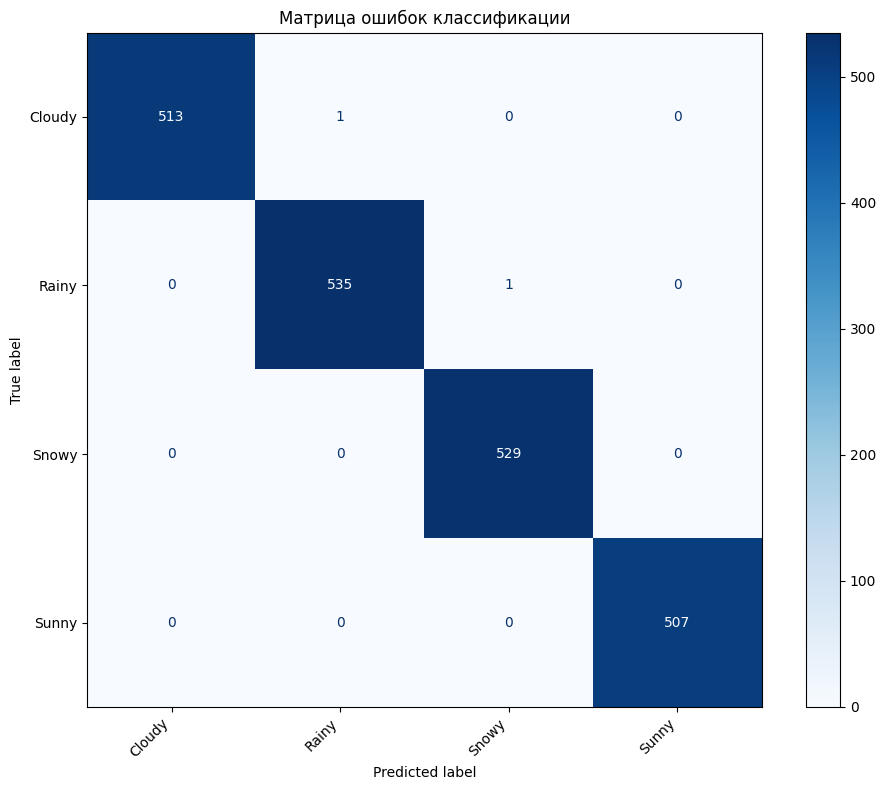

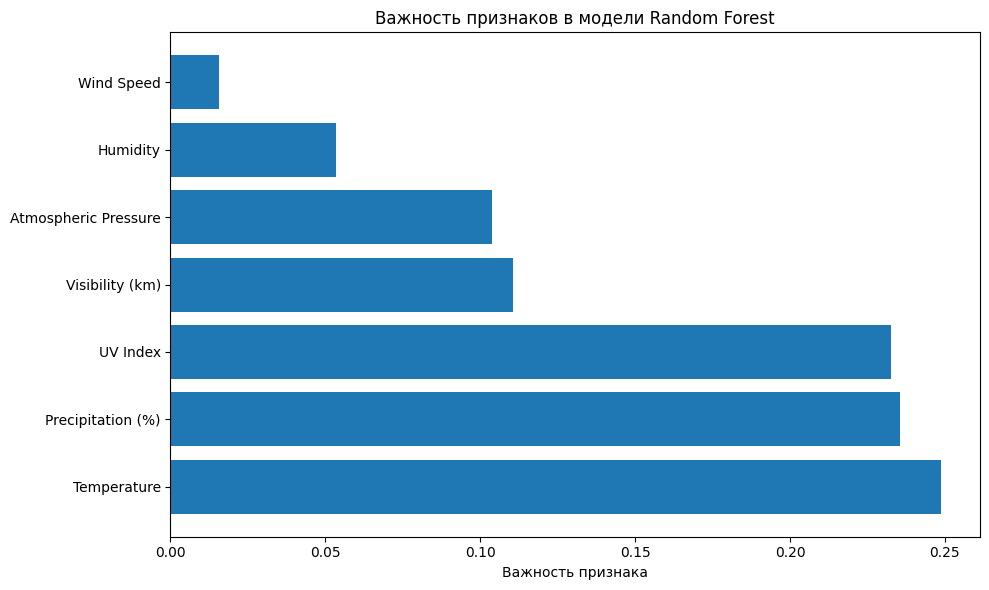

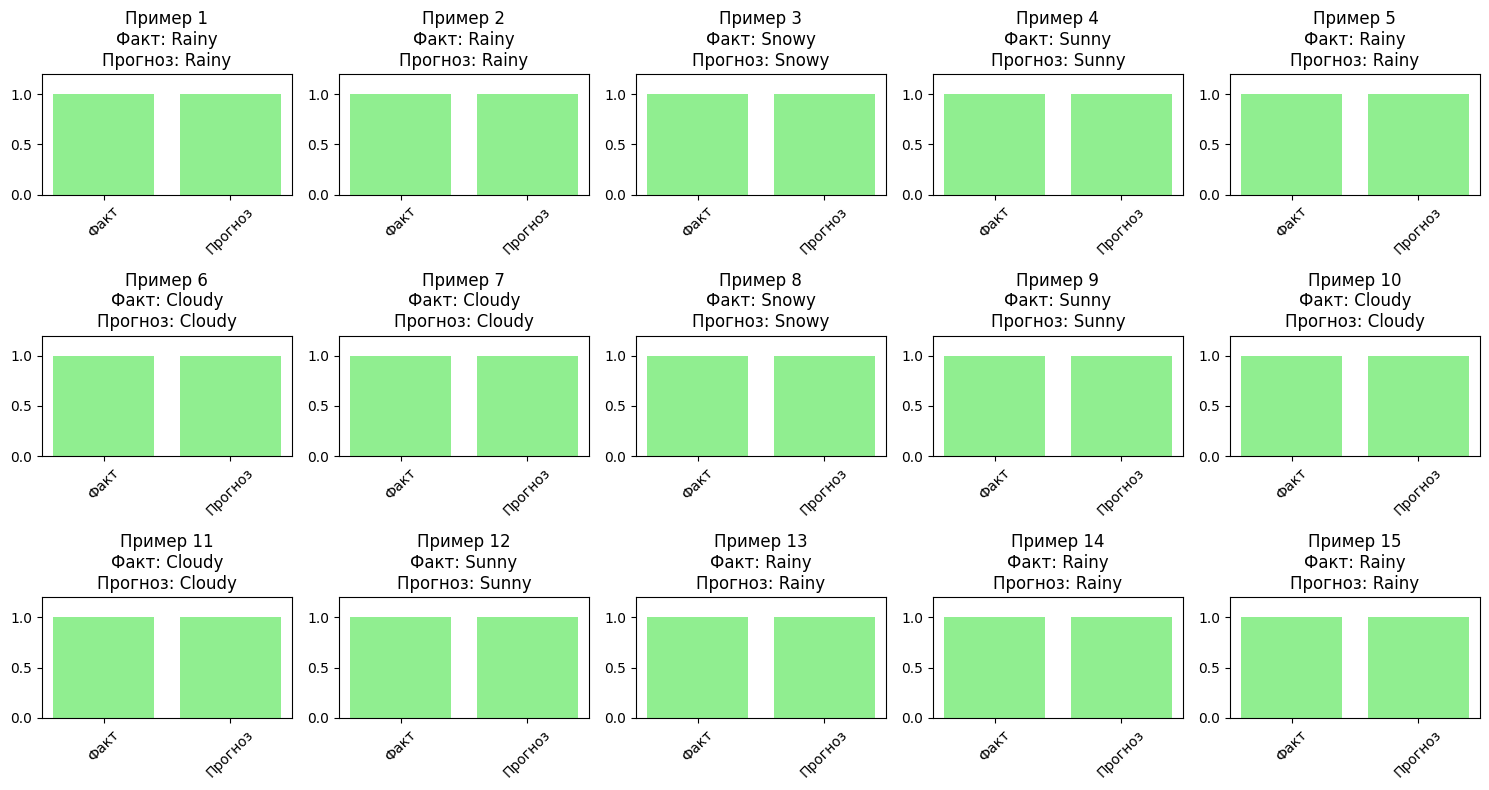

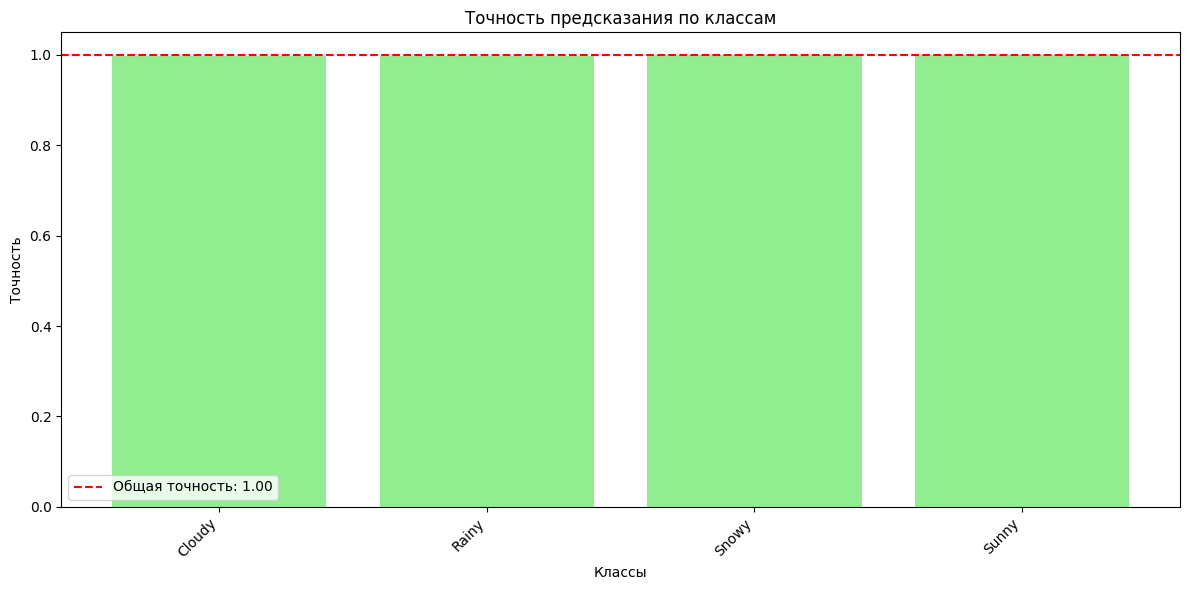

Оценка модели с помощью кросс-валидации...
Результаты кросс-валидации (5 фолдов): [0.99952061 0.99952061 0.99904123 0.99952061 1.        ]
Средняя точность при кросс-валидации: 0.9995 (±0.0003)


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# Подготовка данных
# Закодируем целевую переменную (Weather Type)
le = LabelEncoder()
y = le.fit_transform(df_clean['Weather Type'])
X = df_clean.drop('Weather Type', axis=1)

# Удалим нечисловые колонки (если они есть)
X = X.select_dtypes(include=[np.number])

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

# Масштабируем признаки (не обязательно для Random Forest, но сделаем для возможного сравнения с другими моделями)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучим модель Random Forest
print("Обучение модели Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = rf_model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.4f}")

# Подробный отчет о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Визуализация матрицы ошибок
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.xticks(rotation=45, ha='right')
plt.title('Матрица ошибок классификации')
plt.tight_layout()
plt.show()

# Важность признаков
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Важность признака')
plt.title('Важность признаков в модели Random Forest')
plt.tight_layout()
plt.show()

# Визуализация реальных vs предсказанных значений для нескольких примеров
# Выберем несколько случайных примеров из тестовой выборки
np.random.seed(42)
sample_indices = np.random.choice(len(y_test), min(15, len(y_test)), replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    plt.subplot(3, 5, i+1)

    actual_label = le.inverse_transform([y_test[idx]])[0]
    predicted_label = le.inverse_transform([y_pred[idx]])[0]

    colors = ['lightgreen' if actual_label == predicted_label else 'lightcoral']

    plt.bar(['Факт', 'Прогноз'], [1, 1], color=colors)
    plt.title(f'Пример {i+1}\nФакт: {actual_label}\nПрогноз: {predicted_label}')
    plt.ylim(0, 1.2)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Анализ точности по классам
class_accuracy = {}
for i, class_name in enumerate(le.classes_):
    class_mask = y_test == i
    if np.any(class_mask):
        class_accuracy[class_name] = accuracy_score(y_test[class_mask], y_pred[class_mask])

# Визуализация точности по классам
plt.figure(figsize=(12, 6))
plt.bar(range(len(class_accuracy)), list(class_accuracy.values()),
        color=['lightgreen' if acc > 0.7 else 'lightcoral' for acc in class_accuracy.values()])
plt.axhline(y=accuracy, color='r', linestyle='--', label=f'Общая точность: {accuracy:.2f}')
plt.xlabel('Классы')
plt.ylabel('Точность')
plt.title('Точность предсказания по классам')
plt.xticks(range(len(class_accuracy)), list(class_accuracy.keys()), rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Кросс-валидация для более надежной оценки
from sklearn.model_selection import cross_val_score

print("Оценка модели с помощью кросс-валидации...")
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Результаты кросс-валидации (5 фолдов): {cv_scores}")
print(f"Средняя точность при кросс-валидации: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Dataset head:
     Company \n(Maker-if known) Specific Bean Origin\nor Bar Name   REF  \
0                      A. Morin                       Agua Grande  1876   
1                      A. Morin                             Kpime  1676   
2                      A. Morin                            Atsane  1676   
3                      A. Morin                             Akata  1680   
4                      A. Morin                            Quilla  1704   
...                         ...                               ...   ...   
1790                     Zotter                              Peru   647   
1791                     Zotter                             Congo   749   
1792                     Zotter                      Kerala State   749   
1793                     Zotter                      Kerala State   781   
1794                     Zotter

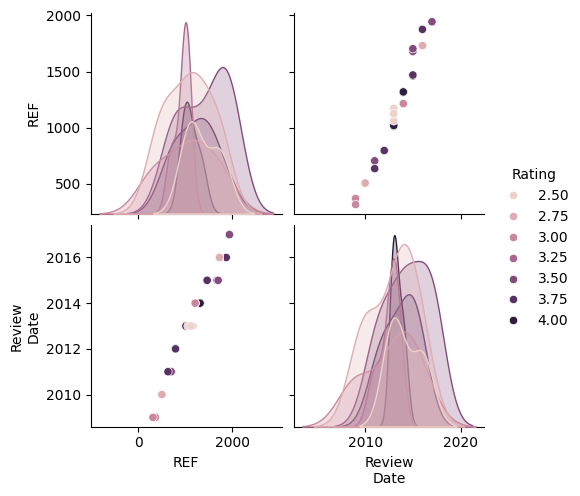

In [ ]:
import pandas as pd
from google.colab import drive
import os
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

#https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings/data
class Data_Loader:

  @staticmethod
  def data_loading(file_link, category, numeric_features, categorical_features):
    try:
      drive.mount('/content/drive')
      file_path = f"/content/drive/{file_link}"

      # Загрузка CSV файла
      dataset = pd.read_csv(file_path)

      if not os.path.exists(file_path):
        raise FileNotFoundError(f"Файл {file_path} не найден")

      # Проверяем, что файл не пустой
      if os.path.getsize(file_path) == 0:
        raise ValueError(f"Файл {file_path} пустой")

      imputer = SimpleImputer(strategy='mean')

      # Выбираем только числовые колонки для импутации
      numeric_columns = numeric_features + [category]

      # Применяем импутер
      dataset[numeric_columns] = imputer.fit_transform(dataset[numeric_columns])

      imputer = SimpleImputer(strategy='most_frequent')

      # Применяем к строковым колонкам
      string_columns = categorical_features
      dataset[string_columns] = imputer.fit_transform(dataset[string_columns])

      return dataset[numeric_features + categorical_features + [category]]

    except FileNotFoundError as e:
      print(f"Ошибка: {e}")
      print("Проверьте наличие файла в Google Drive")
      return None

    except ValueError as e:
      print(f"Ошибка данных: {e}")
      return None

    except Exception as e:
      print(f"Неожиданная ошибка: {e}")
      return None

class Data_Informer:

  @staticmethod
  def show_dataset(dataset):
    print(f"\nDataset head:\n{dataset}\n")

  @staticmethod
  def show_info(dataset):
    print(f"\nDataset info:\n{dataset.info()}\n")

  @staticmethod
  def show_describe(dataset):
    print(f"\nDataset describe:\n{dataset.describe()}\n")

  @staticmethod
  def show_types(dataset):
    print(f"\nDataset types:\n{dataset.dtypes}\n")

  @staticmethod
  def show_null_values(dataset):
    print(f"\nDataset null values:\n{dataset.isnull().sum()}\n")

  @staticmethod
  def show_nan_values(dataset):
    print(f"\nDataset NaN values:\n{dataset.isna().sum()}\n")

  @staticmethod
  def show_all_info(dataset):
    Data_Informer.show_dataset(dataset)
    Data_Informer.show_info(dataset)
    Data_Informer.show_describe(dataset)
    Data_Informer.show_types(dataset)
    Data_Informer.show_null_values(dataset)
    Data_Informer.show_nan_values(dataset)

class Data_Visualiser:
  @staticmethod
  def visualise_pairplot(dataset, category):
    sample_data = dataset.head(50)
    # Построение парных графиков при помощи sns
    sns.pairplot(sample_data, hue=category)
    plt.show()

file_link = 'MyDrive/Colab Notebooks/flavors_of_cacao.csv'
numeric_features = ['REF', 'Review Date']  # числовые признаки
categorical_features = ['Company', 'Specific Origin']  # категориальные признаки
category = 'Rating'  # целевая переменная

file_path = f"/content/drive/{file_link}"
dataset = pd.read_csv(file_path)
drive.mount('/content/drive')


#dataset = Data_Loader.data_loading(
#    file_link=file_link,
#    category=category,
#    numeric_features=numeric_features,
#    categorical_features=categorical_features
#)

Data_Informer.show_all_info(dataset)
Data_Visualiser.visualise_pairplot(dataset, category)